Load libraries


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


Load dataset

In [ ]:
dataset = pd.read_csv(r"D:\Develohub\Task#2\heart_disease_uci.csv")

Clean column names (remove spaces)

In [ ]:
dataset.columns = dataset.columns.str.strip()

 Create binary target

In [ ]:
dataset['target'] = dataset['num'].apply(lambda x: 1 if x > 0 else 0)

Drop irrelevant columns

In [ ]:
dataset.drop(columns=['id', 'dataset', 'num'], inplace=True)

One-hot encode categorical/text columns

In [ ]:

dataset = pd.get_dummies(dataset, drop_first=True)

Handle Missing Values (NaNs)

In [ ]:

dataset.fillna(dataset.mean(numeric_only=True), inplace=True)

Split features and target

In [ ]:


X = dataset.drop('target', axis=1)
y = dataset['target']

Scale features

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-test split Train logistic regression model

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

#  Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("🎯 Model Accuracy:", accuracy)

🎯 Model Accuracy: 0.8097826086956522


Exploratory Data Analysis (EDA)


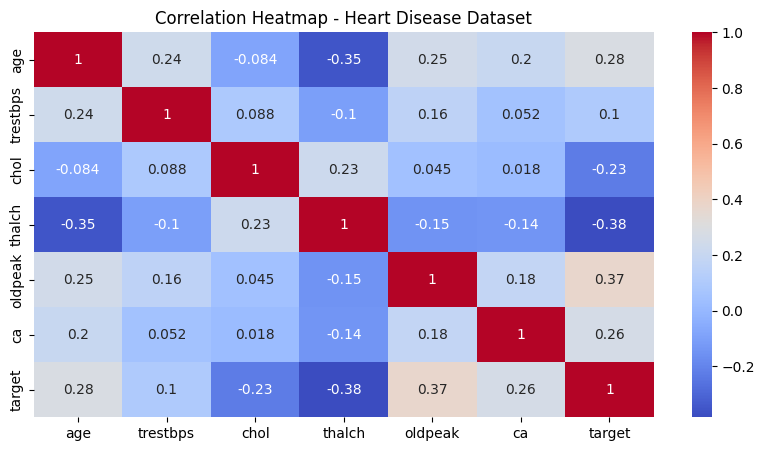

In [ ]:
numeric_data = dataset.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Heart Disease Dataset")
plt.show()

Confusion Matrix

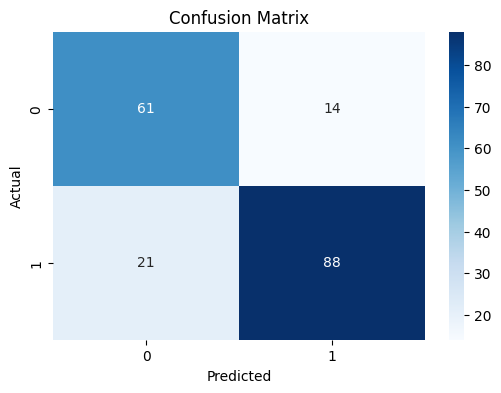

In [ ]:

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC Curve

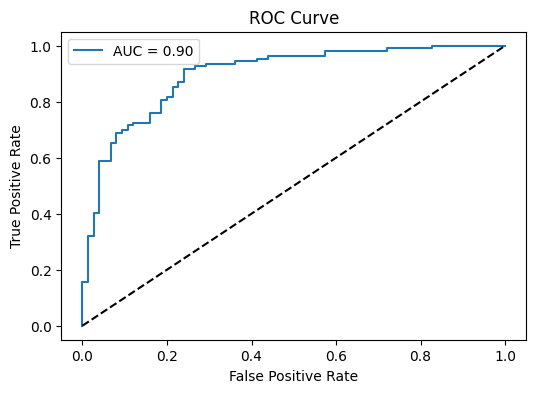

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
